In [1]:
#한글 태깅을 위한 패키지 설치
import os
import numpy as np
import pandas as pd
from konlpy.tag import Okt

In [2]:
#네이버 리뷰 읽어오기
senti = pd.read_csv('material/nsmc/ratings.txt', sep='\t')

In [3]:
train_df = pd.read_csv('material/nsmc/ratings_train.txt', sep='\t')
test_df = pd.read_csv('material/nsmc/ratings_test.txt', sep='\t')

In [4]:
train_df.shape, test_df.shape

((150000, 3), (50000, 3))

In [5]:
tagger = Okt()

In [6]:
# 형태소  태깅에 장시간이 소요됨으로 한번 시행 후 저장하여 활용
#neg=pos여야 하나 코드 이해 오류로 잘못된 변수에 저장을 했고, 변경이 불가능함.
#train_df['pos'] = train_df['document'].map(lambda x : tagger.pos(str(x), norm=True, stem=True))
#test_df['pos'] = test_df['document'].map(lambda x : tagger.pos(str(x), norm=True, stem=True))
#train_df.to_csv('material/nsmc/ratings.txt', index=False)
#test_df.to_csv('material/nsmc/ratings .txt', index=False)

In [7]:
train_df = pd.read_csv('material/nsmc/train.csv')
test_df = pd.read_csv('material/nsmc/test.csv')

In [8]:
#'neg' 열을 'pos'열로 바꾸기 위한 작업
train_df['pos']=train_df['neg']
train_df.drop(['neg'], axis='columns', inplace=True)

In [9]:
train_df.head()

id                                           document  label  \
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0   
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1   
2  10265843                                  너무재밓었다그래서보는것을추천한다      0   
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0   
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1   

                                                 pos  
0  [('아', 'Exclamation'), ('더빙', 'Noun'), ('..', ...  
1  [('흠', 'Noun'), ('...', 'Punctuation'), ('포스터'...  
2  [('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'No...  
3  [('교도소', 'Noun'), ('이야기', 'Noun'), ('구먼', 'Nou...  
4  [('사이', 'Modifier'), ('몬페', 'Noun'), ('그', 'De...

In [10]:
#'neg' 열을 'pos'열로 바꾸기 위한 작업
test_df['pos']=test_df['neg']
test_df.drop(['neg'], axis='columns', inplace=True)

In [11]:
test_df.head()

id                                           document  label  \
0  6270596                                                굳 ㅋ      1   
1  9274899                               GDNTOPCLASSINTHECLUB      0   
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0   
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0   
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0   

                                                 pos  
0     [('굳다', 'Adjective'), ('ㅋ', 'KoreanParticle')]  
1                [('GDNTOPCLASSINTHECLUB', 'Alpha')]  
2  [('뭐', 'Noun'), ('야', 'Josa'), ('이', 'Noun'), ...  
3  [('지루하다', 'Adjective'), ('않다', 'Verb'), ('완전',...  
4  [('3', 'Number'), ('D', 'Alpha'), ('만', 'Noun'...

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer # 벡터화

In [13]:
vectorizer = TfidfVectorizer(max_features=5000) # colab RAM이 부족하여 5천개로 타협
vectorizer.fit(train_df['pos'])
train_X = vectorizer.transform(train_df['pos'])
test_X = vectorizer.transform(test_df['pos'])

In [14]:
len(vectorizer.get_feature_names())

5000

In [15]:
train_y = train_df['label']
test_y = test_df['label']

In [16]:
#모델링에 필요한 module import 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/u1027/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(train_X, train_y, epochs=10, batch_size=512)
results = model.evaluate(test_X, test_y) # 83%의 정확도 확보

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
150000/150000 [==============================] - 3s 21us/sample - loss: 0.4175 - binary_accuracy: 0.8153
Epoch 2/10
150000/150000 [==============================] - 6s 38us/sample - loss: 0.3616 - binary_accuracy: 0.8385
Epoch 3/10
150000/150000 [==============================] - 3s 19us/sample - loss: 0.3504 - binary_accuracy: 0.8430
Epoch 4/10
150000/150000 [==============================] - 6s 37us/sample - loss: 0.3401 - binary_accuracy: 0.8480
Epoch 5/10
150000/150000 [==============================] - 3s 19us/sample - loss: 0.3322 - binary_accuracy: 0.8531
Epoch 6/10
150000/150000 [==============================] - 6s 37us/sample - loss: 0.3257 - binary_accuracy: 0.8574
Epoch 7/10
150000/150000 [==============================] - 3s 19us/sample - loss: 0.3197 - binary_accuracy: 0.8614
Epoch 8/10
150000/150000 [==============================] - 6s 37us/

In [18]:
##대본 감성분석
#대본 불러오기
script = pd.read_csv('대본/건축학개론.csv')

In [19]:
script['pos'] = script['content'].map(lambda x : tagger.pos(str(x), norm=True, stem=True))
script.to_csv('material/nsmc/script.csv', index=False)

In [20]:
script.head()

act                                            content  \
0  지문                                         오래된 집. 오후.   
1  지문  멀리서 매미 소리. 무더운 여름 한 낮. 쨍한 햇살 아래 우두커니 서 있는 허름한 ...   
2  지문                          한동안 비워놓은 듯 집 안은 상태가 엉망이다.   
3  지문  흉하게 일어난 마룻바닥. 꼬질꼬질 얼룩진 벽지. 날카롭게 깨진 유리창. 서연이 창을...   
4  지문                                     설계사무소. 회의실. 낮.   

                                                 pos  
0  [(오래되다, Adjective), (집, Noun), (., Punctuation...  
1  [(멀리, Noun), (서, Josa), (매미, Noun), (소리, Noun)...  
2  [(한동안, Adverb), (비우다, Verb), (듯, Noun), (집, No...  
3  [(흉하다, Adjective), (일어나다, Verb), (마룻바닥, Noun),...  
4  [(설계, Noun), (사무소, Noun), (., Punctuation), (회...

In [21]:
script = pd.read_csv('material/nsmc/script.csv')

In [22]:
tagger = Okt()

In [23]:
script_X = vectorizer.transform(script['pos'])

In [24]:
script_y = model.predict(script_X)

In [25]:
script['label'] = script_y

In [26]:
script.sort_values(by=['label'])

act                                            content  \
206   서연                       시간이 별루 없을 지도 몰라서... 그래서 굳이.    
38    서연                              그래두. 나 별루 변한 것도 없는데.    
889   지문                  변기마다 옮겨 다니면서 일일이 앉아본다. 왠지 민망한데...   
168   서연      글쎄... 별루 생각해본 게... 음... 일단. 밝게. 햇빛이 많이 들어오게.    
414   지문  같이 걷는 건지, 따로 걷는 건지 애매한 간격을 유지한 채. 한 발 앞선 승민 뒤를...   
...   ..                                                ...   
1560  지문          어머니가 잠시 망설이다가... 긴장된 차렷 자세로 가게 간판 앞에 선다.    
703   서연                   어. 승민아! 돌아보면 뒤에서 서연이 손 흔들며 다가온다.   
923   지문  서연이 새로 뚫린 안방 창을 통해 마당을 바라본다. 캔버스 화폭마냥 맑은 하늘 아래...   
671   지문                    감탄의 눈빛으로, 재욱 어깨너머 컴퓨터를 바라보던 승민.   
1509  지문     서연, 울컥... 감정이 복받쳐 오른다. 촉촉해진 눈으로, 애써 웃어 보이며...    

                                                    pos     label  
206   [('시간', 'Noun'), ('이', 'Josa'), ('별루', 'Noun')...  0.003024  
38    [('그래도', 'Adverb'), ('.', 'Punctuation'), ('나'...  0.004534  
889   [('변기', 'Noun'), ('마다', 'Josa'), ('옮기다', 'Verb...  0.004678  
168   [('글쎄', 'Noun'), ('...', 'Punctuation'), ('별루'...  0.005417  
414   [('같이', 'Adverb'), ('걷다', 'Verb'), ('건지다', 'Ve...  0.006216  
...                                                 ...       ...  
1560  [('어머니', 'Noun'), ('가', 'Josa'), ('잠시', 'Noun'...  0.990511  
703   [('어', 'Eomi'), ('.', 'Punctuation'), ('승민', '...  0.991632  
923   [('서연', 'Noun'), ('이', 'Josa'), ('새롭다', 'Adjec...  0.992319  
671   [('감탄', 'Noun'), ('의', 'Josa'), ('눈빛', 'Noun')...  0.992744  
1509  [('서연', 'Noun'), (',', 'Punctuation'), ('울컥', ...  0.993514  

[1661 rows x 4 columns]

In [28]:
##대사 연관분석
main_actor = ['승민','서연','납뜩이','은채','어머니','재욱'] #상위 5명

In [29]:
script_by_actor = pd.DataFrame(index = main_actor)

In [30]:
for actor in main_actor: # 인물별로 대사들의 품사 테깅 데이터를 통합
    script_by_actor.loc[actor, 'scripts'] = script[script['act'] == actor]['pos'].str.cat()

In [31]:
script_by_actor

scripts
승민   [('아', 'Exclamation'), ('...', 'Punctuation'),...
서연   [('오랜', 'Modifier'), ('만이', 'Noun'), ('네', 'Jo...
납뜩이  [('넙죽', 'Adverb'), ('아', 'Josa'), ('!', 'Punct...
은채   [('(', 'Punctuation'), ('버럭', 'Noun'), (')', '...
어머니  [('안', 'Noun'), ('빨다', 'Verb'), ('.', 'Punctua...
재욱   [('...', 'Punctuation'), ('모르다', 'Verb'), ('.'...

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
corvec = TfidfVectorizer()
script_vec = corvec.fit_transform(script_by_actor['scripts'])

In [34]:
import scipy # 벡터거리 계산 함수 https://steemit.com/kr/@anpigon/5
def dist_norm(v1, v2):
    v1_normalized = v1/scipy.sparse.linalg.norm(v1)
    v2_normalized = v2/scipy.sparse.linalg.norm(v2)
    delta = v1_normalized - v2_normalized
    return scipy.sparse.linalg.norm(delta)

In [35]:
cor_mat = np.zeros([6,6]) # 계산된 값을 상관 행렬로 정리
for i in range(6):
    for j in range(6):
        cor_mat[i,j] = dist_norm(script_vec[i], script_vec[j])

In [36]:
! pip install seaborn #시각화를 위한 패키지 설치

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:>

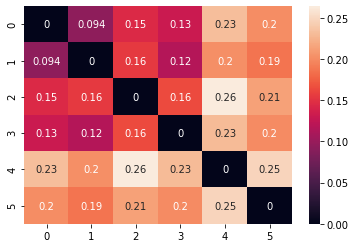

In [37]:
import seaborn as sns
sns.heatmap(cor_mat, annot=True) #'승민','서연','납뜩이','은채','어머니','재욱'

In [38]:
script[(script['act']=="승민") | (script['act']=="서연")].tail(50)

act                                            content  \
1518  서연                                         그냥... 친구야.   
1529  서연                                    고마워. 너무 수고 많았어.   
1530  승민                                               ...    
1531  서연                                            저기 잠깐만.   
1533  서연                                              이거...   
1534  승민                     이걸 왜? 승민을 바라보는 서연이 힘겹게 웃어 보인다.   
1535  서연                                             받어. 승민   
1536  서연                                     너 첫작품이잖아. (웃는)   
1538  서연              ... 궁금하더라고. 너 어떻게 살고 있나... 어떻게 변했을까?    
1539  승민                                               ...    
1540  서연                     날 기억은 할까? 살면서 문득문득... 생각나더라구.    
1541  승민                                               ...    
1542  서연  ... 웃으면서 그런 옛날 얘기 하면 재밌겠다... 그냥 그런 거였는데... 말끝을...   
1543  승민                                            서연아...    
1544  서연                            가서 몸 건강하게 지내. 아프지 말고...   
1546  서연                                     ... 그동안 고마웠어.    
1554  승민                                  엄마. 이제 다 된 거 같은데.   
1557  승민                                 엄마. 여기 봐봐. 사진 찍자.    
1559  승민                                기념으로. 마지막이잖아. 기념사진.   
1561  승민                                    그동안... 수고하셨어요.    
1565  승민                                                ...   
1567  승민                                                ...   
1570  승민                                 ... 엄마. 나 미국가지 말까?   
1572  승민                             나 가면 엄마 혼잔데. 걱정두 되고...   
1574  승민                                                ...   
1579  승민  가게 판 돈을 왜 날 줘? 차라리 이 돈으로 아파트로 이사 가. 가서 엄마도 이제 ...   
1584  승민                       그런 얘기 좀 쉽게 하지마! 엄마가 죽긴 왜 죽어?   
1587  승민                                  엄만 이 집이 지겹지도 않아?    
1590  승민                                                ...   
1592  승민                                                ...   
1594  승민                                                ...   
1596  승민                                                ...   
1601  승민                               (짜증난) 그냥 찢어. 뭘 그걸...   
1603  승민                                                ...   
1605  승민                                                ...   
1611  승민                                               ...    
1614  승민                                  옛날에... 내가 좋아했었어.    
1616  승민                                   아주 많이... 좋아했었어.    
1620  승민                                          응. 그게 다야.   
1622  서연                                               승민아!   
1624  서연                                    너 왜 이렇게 연락이 안돼?   
1626  승민                                  ... 나 집에 씨디가 없어.    
1627  서연                                               ...    
1628  승민                             그리구... 이제 나한테 연락 하지마.    
1629  서연                                    (놀란) ...... 왜?    
1631  승민                                         좀... 꺼져줄래?   
1645  승민                                            ... 그래.   
1648  서연                         아빠... 나 피아노 다시 쳐. (웃는) 좋아?   
1650  서연  성은아. 딴따단딴딴... 이 아니라... 딴따단딴딴딴이지. 자... 예쁘게 10번만 더.   
1653  서연                                     오냐~ 내일까지 연습해와.   

                                                    pos     label  
1518  [('그냥', 'Noun'), ('...', 'Punctuation'), ('친구'...  0.214009  
1529  [('고맙다', 'Adjective'), ('.', 'Punctuation'), (...  0.964879  
1530                           [('...', 'Punctuation')]  0.330501  
1531  [('저기', 'Noun'), ('잠깐', 'Noun'), ('만', 'Josa')...  0.378652  
1533  [('이', 'Determiner'), ('거', 'Noun'), ('...', '...  0.126839  
1534  [('이', 'Determiner'), ('걸', 'Noun'), ('왜', 'No...  0.536675  
1535  [('받다', 'Verb'), ('.', 'Punctuation'), ('승민', ...  0.501397  
1536  [('너', 'Noun'), ('첫', 'Modifier'), ('작품', 'Nou...  0.430000  
1538  [('...', 'Punctuation'), ('궁금하다', 'Adjective')...  0.503334  
1539                           [('...', 'Punctuation')]  0.330501  
1540  [('날', 'Noun'), ('기억', 'Noun'), ('은',

In [39]:
##토픽 추출
from gensim.summarization.summarizer import summarize

In [40]:
text = script['content'].str.cat(sep=' ')

In [41]:
print(summarize(text, word_count=100))

낮. 승민과 서연이 오래된 집 안을 둘러보고 있다.
서연이 소주잔을 뚝딱 비워내면 승민이 공손히 잔을 채운다.
서연이 웃으며 승민을 보다가.
밤. 다시 서연이 열심히 고기를 집어 먹고, 승민이 헌신적으로 굽고 있다.
서연이 승민을 가만히 보다가.
승민이 힐끔거리던 곳엔 서연이 앉아있다.
질끈 묶은 긴 머리만 보이는 서연의 뒷모습을 승민이 물끄러미 바라본다.
승민이 멀어져가는 서연의 뒷모습을 바라본다.
놀란 승민이 그대로 얼어붙은 채 카메라로 서연을 바라본다.
승민이 그런 서연의 옆모습을 물끄러미 바라본다.
(웃는) 화면 바뀌면, 승민과 서연이 마루에 앉아 떡볶이와 오뎅을 먹고 있다.
응. (끊는) 승민이 전화를 끊고 돌아보면 취한 서연이 비틀비틀 다가온다.
서연이 천천히 고개를 들어 승민을 바라본다.
서연이 멍하니 승민의 사진을 보다가...


In [42]:
for actor in main_actor:
    print("------------------")
    print("{}의 대사 요약\n".format(actor))
    text_actor = script[script['act'] == actor]['content'].str.cat(sep=' ')
    print(summarize(text_actor, word_count=30))

------------------
승민의 대사 요약

널 잘 알아야 너한테 맞는 집을 잘 지을 거 아니야?
그동안 어떻게 지냈어?
그래서 트러블 생기는 거 아니야.
그리고 잠겼을 거예요.
여기서 그대로 테라스랑 마당으로 이어지게.
뭐가 그렇게 좋은데?
------------------
서연의 대사 요약

내 집 지어줄 사람이 어떤 사람인지 잘 알아야 나도 믿고 맡길 거 아니야?
옥상에서 혼자 놀고 있는데 보니까 나무에 감이 열린 거야.
살면서 자기 집을 지어본다는 게 얼마나 대단한 일이야.
------------------
납뜩이의 대사 요약

납뜩이 안되네.
납뜩이.
이 열라 납뜩 안되는 새끼야.
그럼 사람이 궁금하게 돼있어.
이러면서 나오게 돼있어.
(양손을 비비며) 이렇게이렇게...
그 다음엔 (빨리 비비며) 졸라 이렇게이렇게...
그러면...
그러면...
새끼야...
새끼야...
새끼야...
------------------
은채의 대사 요약

팀장님 친구래요.
그것도 반은 생선이.
(자르는) 팀장님 얘기 했어요.
그래두 언니는 아셔야 될 거 같아서.
그렇게 어떻게 사냐?
그래두 신혼인데...
한번 생각해 보는 게 그렇게 힘들어?
그것도 겨우 잡은 거예요.
------------------
어머니의 대사 요약

그런데 쓸 돈이 어딨어?
오늘도 2만원 밖에 못 팔고 들어와서 속상해 죽겠는데!
그게 무슨 뚱단지같은 소리야?
가득이나 골치 아파 죽겠는데 얘가 웬 헛소리야.
(웃는) 그게 무슨 뚱딴지같은 소리야?
집이 지겨운 게 어딨어.
------------------
재욱의 대사 요약

모르겠는데요.
강북은 잘 몰라서...
넌 내가 식권으로 보이니?
맨날 나만 보면 밥을 사달래...
어렵진 않아?
그러니까 별거 없어.
방송반 후배.
방송반 후배.
방송반 압서방파 한 명 늘었네.
그러니까 배워야지.
서연아.
